In [18]:
import pandas as pd
import numpy as np 
import requests
import json
from pprint import pprint
from config import key_dict
from datetime import datetime
import time
import gmaps
import matplotlib as plt
import os
import csv

In [19]:
data = "aqi_data.csv"

In [66]:
sd_atmosphere = pd.read_csv(data)
sd_atmosphere

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
0,1/1/2018,139,PM2.5,Donovan,06-073-1014,AQS,11,54,0,.,139,33
1,1/2/2018,94,PM2.5,Donovan,06-073-1014,AQS,15,48,0,48,94,47
2,1/3/2018,94,PM2.5,Chula Vista,06-073-0001,AQS,14,40,0,.,94,42
3,1/4/2018,76,PM2.5,Donovan,06-073-1014,AQS,15,44,0,.,76,49
4,1/5/2018,78,PM2.5,Donovan,06-073-1014,AQS,16,35,0,26,78,43
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,3/20/2021,42,Ozone,Chula Vista,06-073-0001,AirNow,NaN,42,NaN,NaN,23,NaN
1172,3/21/2021,48,Ozone,Alpine,06-073-1006,AirNow,NaN,48,NaN,NaN,44,NaN
1173,3/22/2021,50,Ozone,Alpine,06-073-1006,AirNow,NaN,50,NaN,NaN,48,NaN
1174,3/23/2021,44,Ozone,Alpine,06-073-1006,AirNow,NaN,44,NaN,NaN,42,NaN


In [38]:
#drop any rows w missing data
clean_aqi_df = sd_atmosphere.dropna(how = 'any')
clean_aqi_df = clean_aqi_df.replace('.', None)

In [43]:
clean_aqi_df["CO"] = clean_aqi_df["CO"].astype(float)

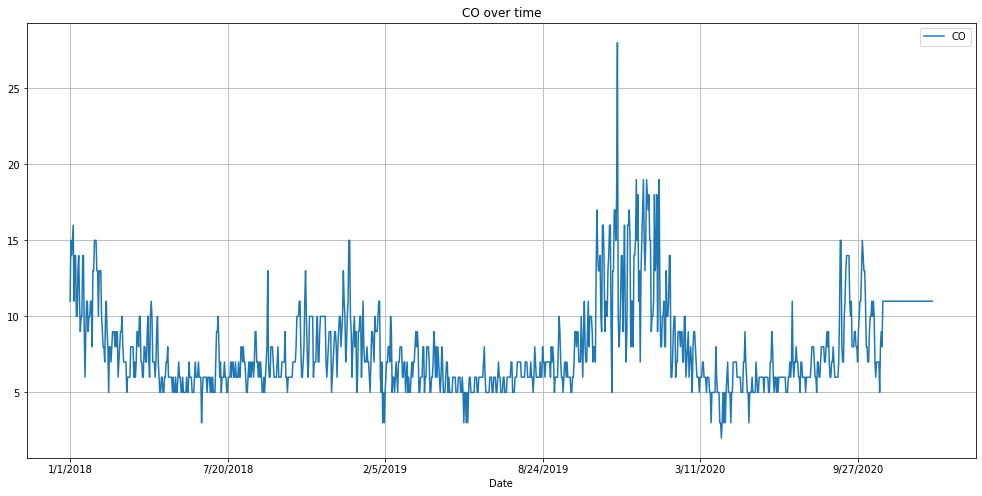

In [46]:
clean_aqi_df.plot(kind="line", x="Date", y="CO", grid=True, figsize=(17,8),
              title="CO over time")

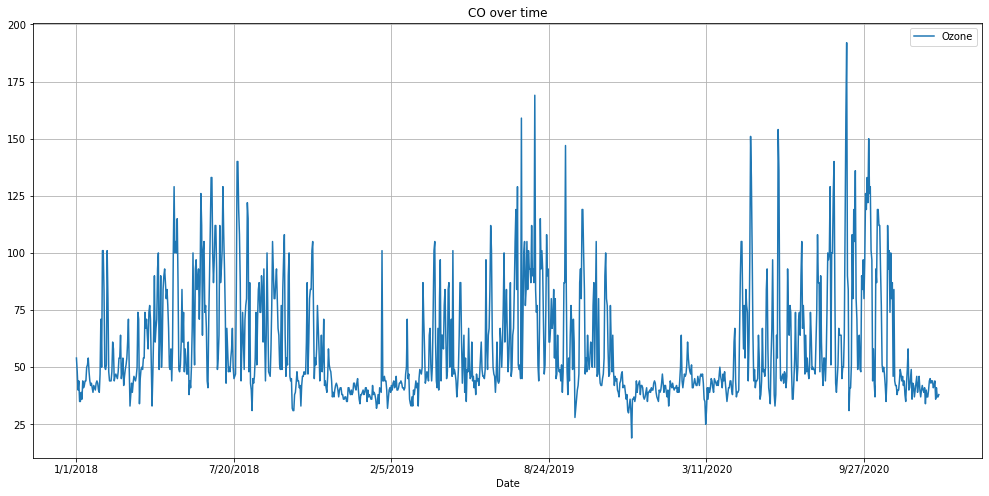

In [47]:
clean_aqi_df.plot(kind="line", x="Date", y="Ozone", grid=True, figsize=(17,8),
              title="CO over time")

In [50]:
clean_aqi_df["SO2"] = clean_aqi_df["SO2"].astype(float)

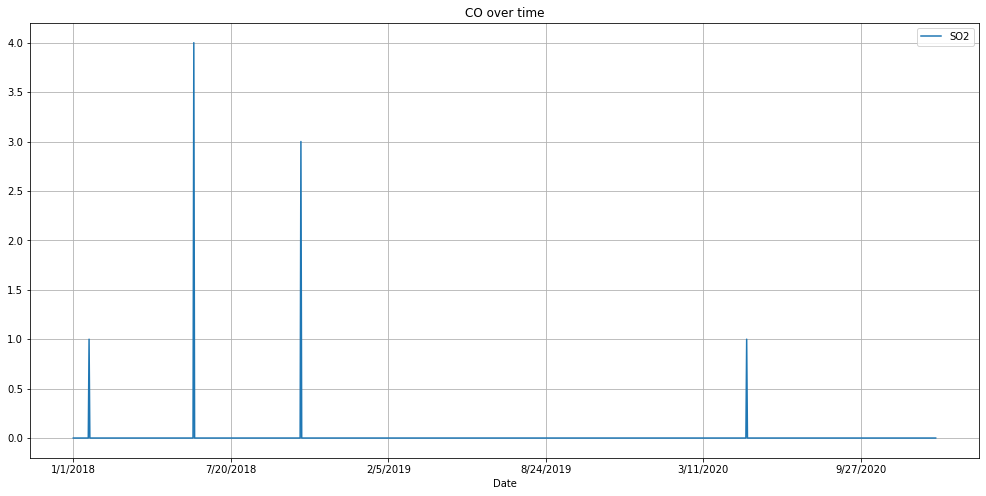

In [52]:
clean_aqi_df.plot(kind="line", x="Date", y="SO2", grid=True, figsize=(17,8),
              title="CO over time")

In [80]:
# clean_aqi_df["CO"] = clean_aqi_df["CO"].astype(float)clean_aqi_df["PM10"] = clean_aqi_df["PM10"].replace('\.', None) 
# clean_aqi_df["PM10"] = clean_aqi_df["PM10"].astype(float)
# clean_aqi_df['PM10'].value_counts()
clean_aqi_df.loc[clean_aqi_df["PM10"] == '.']
clean_aqi_df["PM10"] = clean_aqi_df["PM10"].astype(float)

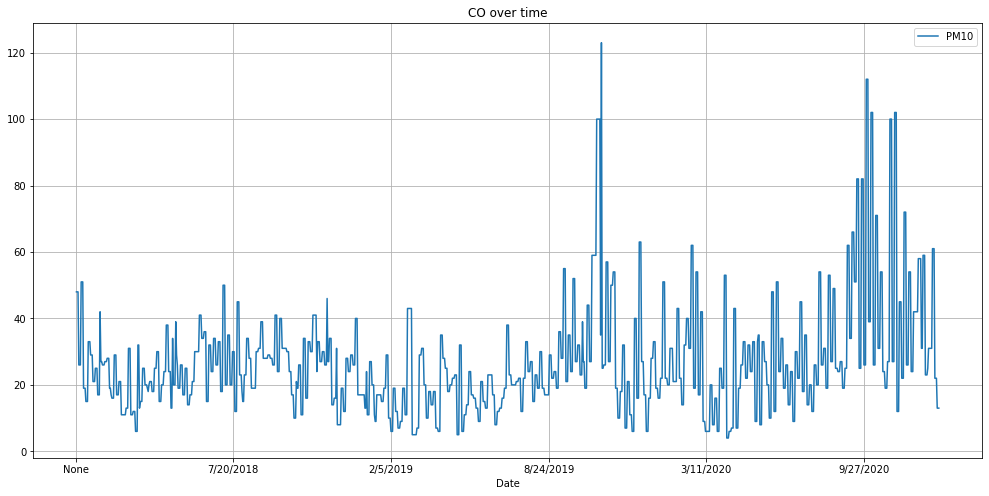

In [81]:
clean_aqi_df.plot(kind="line", x="Date", y="PM10", grid=True, figsize=(17,8),
              title="CO over time")